In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_log_error
import warnings

warnings.filterwarnings('ignore')

# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('/content/drive/MyDrive/Final/VCB_Stock_Data.csv', header=0, parse_dates=[0], index_col=0)
df = df.dropna()  # Drop missing values

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())
df = df.dropna()  # Drop missing values
df = df.reset_index(drop=True)  # Reset the index


                    Open          High           Low         Close  \
Date                                                                 
2014-01-27  12352.807617  12352.807617  12181.833984  12181.833984   
2014-02-06  12181.833984  12181.833984  11882.630859  11925.374023   
2014-02-07  11968.117188  12053.604492  11839.887695  11882.630859   
2014-02-10  11925.374023  12096.347656  11839.887695  12096.347656   
2014-02-11  12139.090820  12224.577148  12053.604492  12096.347656   

               Adj Close     Volume  
Date                                 
2014-01-27  12181.833984  1740361.0  
2014-02-06  11925.374023  2882673.0  
2014-02-07  11882.630859  1889556.0  
2014-02-10  12096.347656  1143474.0  
2014-02-11  12096.347656  2232159.0  


In [3]:
# 2. chia train test validate theo tỉ lệ 7:3
# Split the data into training, testing
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

X2D = df[['High']]  # Biến độc lập theo mảng 2 chiều
Y2D = df[['Close']]  # Biến phụ thuộc theo mảng 2 chiều

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index  # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình Random Forest
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Ví dụ các giá trị cho số cây trong rừng
    'max_depth': [None, 10, 20, 30],  # Ví dụ các giá trị cho độ sâu tối đa của mỗi cây
    'min_samples_split': [2, 5, 10],  # Ví dụ các giá trị cho số lượng mẫu tối thiểu để chia một nút
    'min_samples_leaf': [1, 2, 4]  # Ví dụ các giá trị cho số lượng mẫu tối thiểu ở lá
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
rf_model = grid_search.fit(x_train, y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 9026720.120438624


In [5]:
# dự đoán test
y_pred = rf_model.predict(x_test)
y_pred

array([64139.8967968 , 64818.0845315 , 64526.10343774, 64626.97140638,
       65240.12742208, 65240.12742208, 65484.32960982, 65240.12742208,
       66076.24851568, 66076.24851568, 66076.24851568, 66076.24851568,
       66076.24851568, 66076.24851568, 66076.24851568, 66076.24851568,
       66076.24851568, 66076.24851568, 66076.24851568, 66076.24851568,
       66076.24851568, 66076.24851568, 66076.24851568, 66076.24851568,
       66076.24851568, 61476.77831244, 64402.67585956, 63526.73882814,
       64133.25890632, 65484.32960982, 65484.32960982, 66076.24851568,
       65240.12742208, 64532.73929712, 66076.24851568, 66076.24851568,
       66076.24851568, 66076.24851568, 66076.24851568, 66076.24851568,
       65240.12742208, 65484.32960982, 65532.10804734, 66076.24851568,
       65371.51921916, 65240.12742208, 64495.57820336, 64402.67585956,
       62097.3685157 , 63484.26914064, 64133.25890632, 64073.53585944,
       64402.67585956, 63526.73882814, 63484.26914064, 64532.73929712,
      

In [6]:
last_row = df.tail(1)
last_data = last_row['Close'].values.reshape(-1, 1)
last_data

array([[83700.]])

In [7]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = rf_model.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1, 1)
x_next_30_days

[array([66076.24851568]),
 array([65240.12742208]),
 array([64672.09562514]),
 array([64532.73929712]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336]),
 array([64495.57820336])]

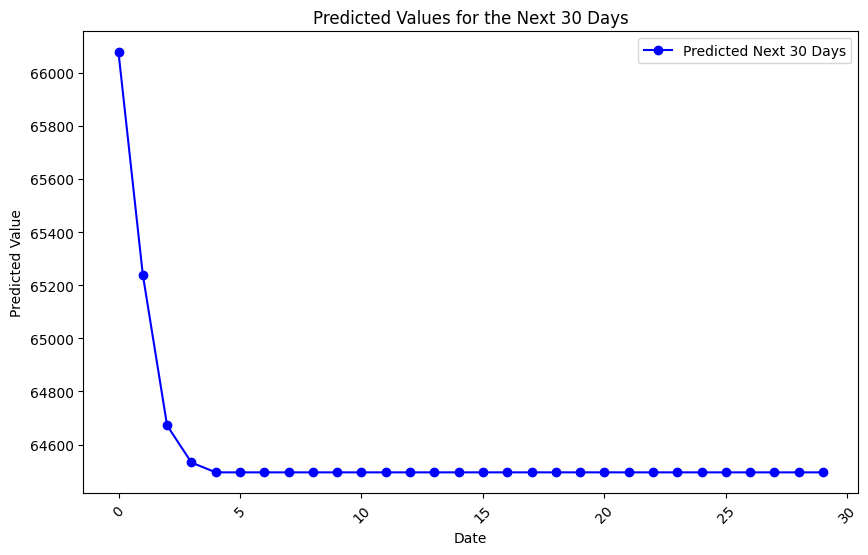

In [8]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [9]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1, 1)

In [10]:
# 7. Đánh giá độ chính xác test bằng RMSE, MSLE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape)
# MSLE
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)

Testing RMSE: Close    10159.627701
dtype: float64
Testing MAPE: 0.08076725937914361
Testing MSLE: 0.018352934178862967


In [11]:
# Tạo index cho 30 ngày tiếp theo
last_index = df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index + 30, step=1)

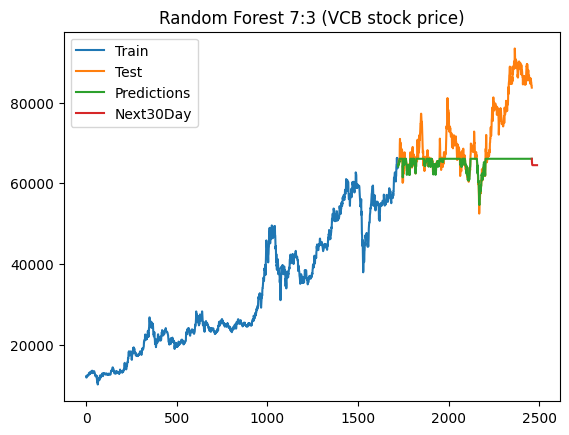

In [12]:
# 9.Vẽ hình
plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates, x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions', 'Next30Day'])
plt.title('Random Forest 7:3 (VCB stock price)')
plt.show()